<a href="https://colab.research.google.com/github/MRUTYUNJAYAMOHANTY/DATA-SCIENCE/blob/master/TENSORFLOW/Neural_Network_Regression_TF/%F0%9F%9B%A0_01_Neural_network_regression_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up our intuition.

1. Create our own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to our own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things we might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if we increase it by 10x?
  * What happens if we train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds 

## 1. Create our own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.




In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

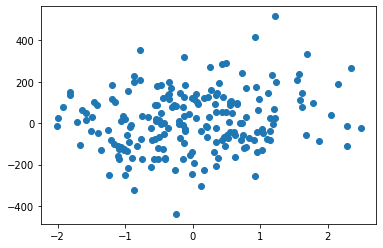

In [3]:
# Let's visualize the dataset 

plt.scatter(X[:, 0] , y)

In [4]:
# Modelling our dummy data 

# Set the random seed 
tf.random.set_seed(42)

# Create a model using the Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fitting the model 
model.fit(X , y , epochs = 10)

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 114.5376 - mae: 114.5376
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 114.5262 - mae: 114.5262
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 114.5154 - mae: 114.5154
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 114.5048 - mae: 114.5048
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 114.4940 - mae: 114.4940
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 114.4832 - mae: 114.4832
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 114.4726 - mae: 114.4726
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 114.4615 - mae: 114.4615
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 114.4505 - mae: 114.4505
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 114.4396 - mae: 114.4396


## 2. Try building a neural network with 4 Dense layers and fitting it to our own regression dataset, how does it perform?

In [5]:
# Building the model again with 4 Dense layers 
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
]) 

# Compile the model
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
model.fit(X , y , epochs= 10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 114.2302 - mae: 114.2302
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 114.1534 - mae: 114.1534
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 114.0684 - mae: 114.0684
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 113.9835 - mae: 113.9835
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 113.8871 - mae: 113.8871
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 113.7738 - mae: 113.7738
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 113.6464 - mae: 113.6464
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 113.4889 - mae: 113.4889
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 113.3109 - mae: 113.3109
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 113.0944 - mae: 113.0944


Seems the model isn't improving maybe running for more epochs would do the magic. But let's split this into train and test set to help our model to generalize well. 

In [6]:
# Splitting the data into train and test splits 
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 )

# Checking the shapes of our splitted data 
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [7]:
# Let's build the model from scratch 
tf.random.set_seed(42)

# Model 1 with one layer and fewer units 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model only our training data 
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 110.2633 - mae: 110.2633
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 110.0337 - mae: 110.0337
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 109.7767 - mae: 109.7767
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 109.4655 - mae: 109.4655
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 109.1031 - mae: 109.1031
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 108.6876 - mae: 108.6876
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 108.1988 - mae: 108.1988
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 107.6324 - mae: 107.6324
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 106.9764 - mae: 106.9764
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 106.2551 - mae: 106.2551
Epoch 11/100
5/5 [=====================

In [8]:
# Evaluating our model on the test data (unseen data)
model_1.evaluate(X_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 124.2308 - mae: 124.2308


[124.23075866699219, 124.23075866699219]

In [9]:
# Getting the predictions of our model 
y_preds_1 = model_1.predict(X_test)
y_preds_1

2/2 [==============================] - 0s 6ms/step


array([[ 0.8652866 ],
       [ 1.3496622 ],
       [-0.6346812 ],
       [-0.8235482 ],
       [-0.20115623],
       [ 1.0798113 ],
       [-1.8706858 ],
       [ 1.2022083 ],
       [-0.15521902],
       [ 1.4330004 ],
       [-1.3982635 ],
       [ 0.74601024],
       [ 1.3424768 ],
       [ 0.40089735],
       [ 0.9788361 ],
       [ 0.40147293],
       [-2.4306285 ],
       [-2.5300171 ],
       [ 0.07610857],
       [ 1.4682271 ],
       [ 0.50580055],
       [ 0.45578778],
       [ 0.23074579],
       [-1.0552256 ],
       [ 0.7145417 ],
       [ 0.7861875 ],
       [ 0.55611485],
       [-2.0764275 ],
       [-0.9544095 ],
       [-0.2780211 ],
       [-0.6125803 ],
       [-0.29867777],
       [-2.1533208 ],
       [-0.1232318 ],
       [ 0.26863435],
       [-1.0949976 ],
       [ 1.3591707 ],
       [ 1.4950202 ],
       [ 0.6268215 ],
       [ 2.5618393 ]], dtype=float32)

In [10]:
def plot_predictions(train_data,
                     train_labels, 
                     test_data,
                     test_labels, 
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

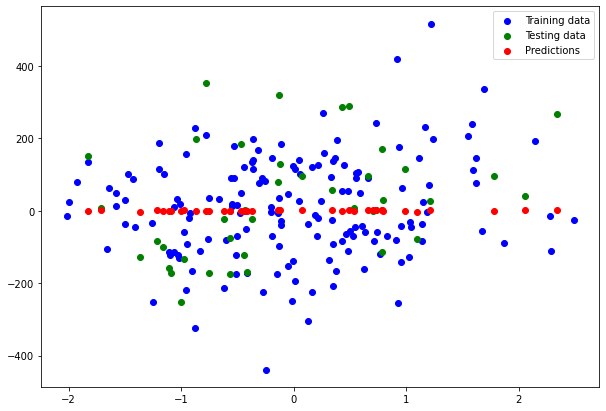

In [11]:
# Plotting our predictions with our target 
plot_predictions(X_train[:,0] , y_train ,  
                 X_test[:,0] , y_test , y_preds_1)

Great! Our model is trying to predict the points but it's not doing a great job with it. 

Let's try couple of experiments and see how it goes.


In [12]:
# Building a model with 2 layers and fewer units
tf.random.set_seed(42)

# Build the model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) ,
  tf.keras.layers.Dense(10), 
])

# Compile the model 
model_2.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_2.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 111.7385 - mae: 111.7385
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 111.7213 - mae: 111.7213
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 111.7050 - mae: 111.7050
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 111.6876 - mae: 111.6876
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 111.6699 - mae: 111.6699
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 111.6521 - mae: 111.6521
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 111.6337 - mae: 111.6337
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 111.6145 - mae: 111.6145
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 111.5943 - mae: 111.5943
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 111.5749 - mae: 111.5749
Epoch 11/100
5/5 [=====================

In [13]:
# Building our model with 3 layers and with more hidden units 

tf.random.set_seed(42)

# Creating the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50), 
  tf.keras.layers.Dense(1) # Should be always one 
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_3.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 111.4421 - mae: 111.4421
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 110.9626 - mae: 110.9626
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 110.4875 - mae: 110.4875
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 109.9291 - mae: 109.9291
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 109.3220 - mae: 109.3220
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 108.5972 - mae: 108.5972
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 107.7597 - mae: 107.7597
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 106.7588 - mae: 106.7588
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 105.5749 - mae: 105.5749
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 104.1966 - mae: 104.1966
Epoch 11/100
5/5 [=====================

Look at that, but we shouldn't be excited lets evaluate on the test data. 

In [14]:
model_3.evaluate(X_test , y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3318 - mae: 0.3318


[0.33178815245628357, 0.33178815245628357]

This is what we want error should be loss. Let's plot our predictions with targets!

In [15]:
# Making predictions 
y_preds_3 = model_3.predict(X_test)
y_preds_3.shape

2/2 [==============================] - 0s 5ms/step


(40, 1)

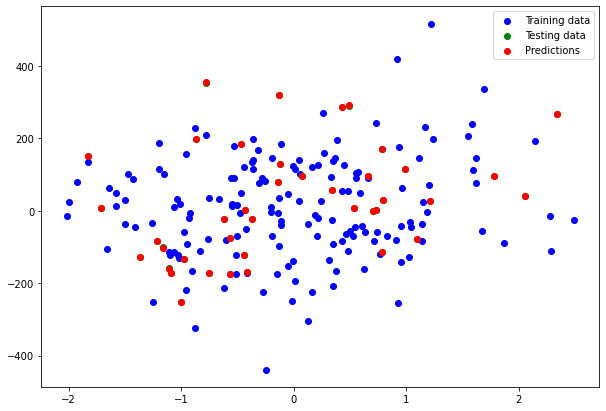

In [16]:
plot_predictions(X_train[: , 0] , y_train , 
                 X_test[: , 0] , y_test , 
                 y_preds_3)

Our model has predicted every test data correctly. We can't spot a green dot (test data) it's because our predictions (red dot) overlapped. 

Our model is doing a perfect job!

## 3. Try and improve the results we got on the insurance dataset, some things we might want to try include:
- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is,what happens if we increase it by 10x?
- What happens if we train for longer (say 300 epochs instead of 200)?

### Building a larger model (how does one with 4 dense layers go?)

In [17]:
# Let's download the data 
import pandas as pd 
import numpy as np 

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

data.shape

(1338, 7)

Our insurance data has 1338 rows and 7 columns

In [18]:
# Looking into the data 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have some categorical variables, let's convert those columns into numerial used pandas.

In [19]:
# Turn categorical into numbers 
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [20]:
# Splitting into X and Y 

X = data_one_hot.drop('charges' , axis = 1)
y = data_one_hot['charges']

X.shape , y.shape

((1338, 11), (1338,))

In [21]:
# Creating train and test split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shapes
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [22]:
# Building the model with 4 dense layers and more units

tf.random.set_seed(42)

# Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(300) , 
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50) ,
  tf.keras.layers.Dense(1)
])


# Compiling the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 10725.5371 - mae: 10725.5371
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7422.3755 - mae: 7422.3755
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7066.0674 - mae: 7066.0674
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6787.9712 - mae: 6787.9712
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6686.8662 - mae: 6686.8662
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6569.1294 - mae: 6569.1294
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6504.2661 - mae: 6504.2661
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6468.7095 - mae: 6468.7095
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6328.6621 - mae: 6328.6621
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6208.7837 - mae: 6208.78

### Lookup the documentation of Adam and find out what the first parameter is,what happens if we increase it by 10x?

And running for 400 epochs

In [23]:
# Let's tweak the Adam Optimizer's learning rate 

tf.random.set_seed(42)

# Create the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100) , 
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compiling the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001*10 ) , 
              metrics = ['mae'])

# Fit the model 
history = model.fit(X_train , y_train , epochs = 400)

Epoch 1/400
34/34 [==============================] - 0s 2ms/step - loss: 8796.1865 - mae: 8796.1865
Epoch 2/400
34/34 [==============================] - 0s 2ms/step - loss: 6854.7275 - mae: 6854.7275
Epoch 3/400
34/34 [==============================] - 0s 2ms/step - loss: 6095.8560 - mae: 6095.8560
Epoch 4/400
34/34 [==============================] - 0s 2ms/step - loss: 4770.4805 - mae: 4770.4805
Epoch 5/400
34/34 [==============================] - 0s 2ms/step - loss: 4124.4219 - mae: 4124.4219
Epoch 6/400
34/34 [==============================] - 0s 2ms/step - loss: 3937.0679 - mae: 3937.0679
Epoch 7/400
34/34 [==============================] - 0s 2ms/step - loss: 4076.7976 - mae: 4076.7976
Epoch 8/400
34/34 [==============================] - 0s 2ms/step - loss: 4108.9053 - mae: 4108.9053
Epoch 9/400
34/34 [==============================] - 0s 2ms/step - loss: 4235.0166 - mae: 4235.0166
Epoch 10/400
34/34 [==============================] - 0s 2ms/step - loss: 3902.6631 - mae: 3902.6631

In [24]:
# Evaluate on test data 
model.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3220.6233 - mae: 3220.6233


[3220.623291015625, 3220.623291015625]

Text(0.5, 0, 'Epochs')

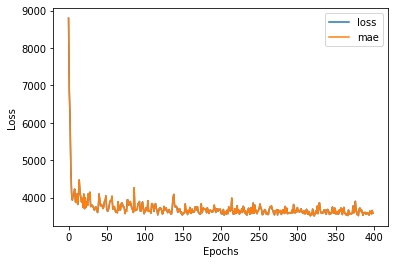

In [25]:
# Let's plot the loss curve Vs Epochs 
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

Seems even increasing the learning rate and the number of epochs the model isn't performing an greater level. 

## 4. Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [26]:
# Getting the boston datasets from tensorflow datasets 

(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)

57026/57026 [==============================] - 0s 0us/step


In [27]:
# Checkin the shape of our data 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((404, 13), (102, 13), (404,), (102,))

This datasets is numpy array format and it's normalized. 

In [28]:
# Let's build a model 

tf.random.set_seed(42)

# Building a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
history = model.fit(X_train , y_train , epochs  = 300 )

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 95.6416 - mae: 95.6416
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 15.5989 - mae: 15.5989
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 8.6769 - mae: 8.6769
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 7.5622 - mae: 7.5622
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 7.1922 - mae: 7.1922
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 6.3219 - mae: 6.3219
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 6.7137 - mae: 6.7137
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 6.3261 - mae: 6.3261
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 7.6760 - mae: 7.6760
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 8.2790 - mae: 8.2790
Epoch 11/300
13/13 [==============================] - 0

In [29]:
# Let's evaluate on the test data 
model.evaluate(X_test , y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.7935 - mae: 3.7935


[3.7935428619384766, 3.7935428619384766]

Text(0.5, 0, 'epochs')

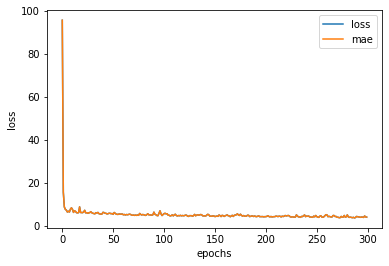

In [30]:
# Plotting the loss Vs Epoch 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Alright we're done solving Exercise of the modeule Neural Network Regression with TensorFlow. 